# Pomysł na eksperymenty

- zrobic kilka kategori z różnym wynikiem assortivity (idk co .2)
- podzielic je na rozmiary może? 
- smol to byłby 50 wierzchołków, z równymi i nierównymi rozmiarami
- medium to moze 300 wierzchłoków???
- large to 1000 (do konsultacji z siudemem)


# TODO

- zobaczyc o co chodzi z tą miarą assortavity DONE
- pomyślec jak podzielić grafy na kategorie DONE
- dodac wybieranie optymalnego resolution do leiden DONE
- przemyśleć czy stroić hiperparametry w clusteringu
- jak przedstawić wyniki na wykresach
- zrobić osobne experymenty dla algorytmów bez specyfikacji ilości communities
- zobaczyć czy jest problem w detekcji ilości klastrów
- zmienic funkcje tak żeby zwracało wszystkie wyniki zeby było można było zrobić boxploty z tego
- pomysleć może żeby rozmiary sie generowały automatycznie, żeby nie były takie równe

In [1]:
import sys  
sys.path.insert(1, 'C:/Users/Kinga/Desktop/MAGISTERKA/code')

from clustering_script import *
from graph_generating_script import *

# Testing

### Test 1

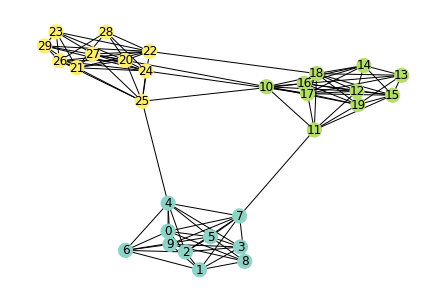

In [4]:
(G, true_labels) = generate_G([10,10,10], .8, .01)
nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)

In [11]:
G.nodes[1]['community']

0

In [9]:
steady_full_experiment([10,10,10], .8, .01, 5)

,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Girvan Newman,Leiden
0,kamada_kawai,0.866630,0.837812,0.884670,0.884670,0.775073,1.0,0.884
1,spring,1.000000,1.000000,1.000000,1.000000,0.821538,1.0,0.884
2,davidson_harel,0.794769,0.825530,0.794769,0.794769,0.794769,1.0,0.884
3,drl,0.884000,0.884000,0.884000,0.884000,0.884000,1.0,0.884
4,fruchterman_reingold,0.884000,0.884000,0.884000,0.884000,0.833436,1.0,0.884
5,graphopt,0.884000,0.855707,0.884000,0.884000,0.884000,1.0,0.884
6,lgl,0.080409,0.517268,0.080409,0.080409,0.072853,1.0,0.884
7,mds,0.535473,0.662174,0.552056,0.561287,0.764155,1.0,0.884


### Test 2

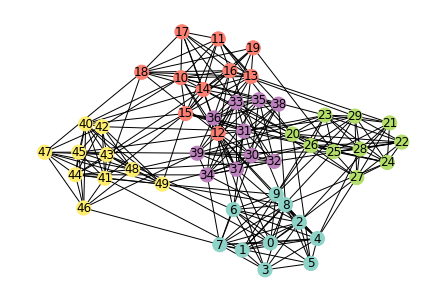

In [3]:
(G, true_labels) = generate_G([10,10,10, 10, 10], .8, .08)
nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)

In [7]:
df = steady_full_experiment([10,10,10, 10, 10], .8, .08, 5)

NameError: name 'generate_G' is not defined

### Test 3

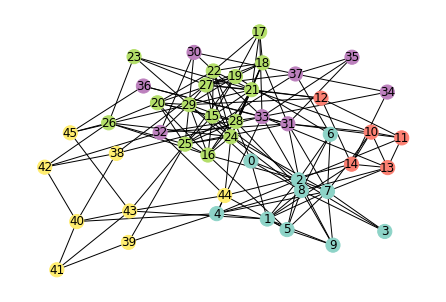

In [4]:
(G, true_labels) = generate_G([10, 5, 15, 8, 8], .5, .05)
nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)

In [13]:
steady_full_experiment([10, 5, 15, 8, 8], .5, .05, 5)

,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Girvan Newman,Leiden
0,kamada_kawai,0.436371,0.197825,0.518137,0.401987,0.276315,0.582956,0.155925
1,spring,0.385744,0.199351,0.382752,0.392318,0.155924,0.589295,0.146941
2,davidson_harel,0.167566,0.029073,0.179289,0.172008,0.168626,0.582956,0.146941
3,drl,0.065571,0.011393,0.071028,0.053928,0.031174,0.582956,0.146941
4,fruchterman_reingold,0.106105,0.037586,0.107198,0.080550,0.092003,0.582956,0.146941
5,graphopt,0.123411,0.053438,0.110400,0.106884,0.077662,0.582956,0.146941
6,lgl,0.021756,0.043951,0.021756,0.021756,0.019231,0.523917,0.155925
7,mds,0.111026,0.079521,0.102880,0.114435,0.130525,0.582956,0.146941


### Test on a single graph

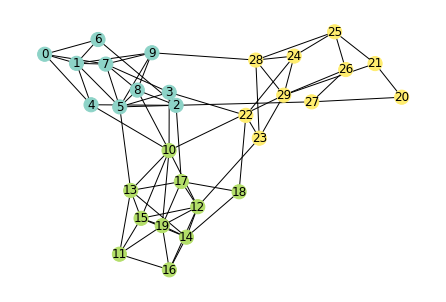

In [5]:
#graph generating
import networkx as nx
import matplotlib.pyplot as plt
sizes = [10, 10, 10]
probs = [[0.5, 0.05, 0.05], [0.05, 0.5, 0.05], [0.05, 0.05, 0.5]]
true_labels=[]
i=0
for size in sizes:
    true_labels += ([i]*size)
    i += 1
G = nx.stochastic_block_model(sizes, probs, seed=212)
nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)

In [6]:
full_experiment_on_graph(G, true_labels)

,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Girvan Newman,Leiden
0,kamada_kawai,0.808229,0.469237,1.000000,1.000000,0.808229,1.0,0.484444
1,spring,1.000000,0.753820,0.898170,0.898170,0.717099,1.0,0.484444
2,davidson_harel,0.125538,0.242473,0.143728,0.125538,0.125538,1.0,0.484444
3,drl,-0.004490,0.021592,-0.004490,-0.004490,0.073921,1.0,0.484444
4,fruchterman_reingold,0.484444,0.398102,0.484444,0.484444,0.426539,1.0,0.484444
5,graphopt,0.484444,0.316988,0.484444,0.484444,0.426539,1.0,0.484444
6,lgl,-0.004453,0.271879,-0.004453,-0.004453,0.000000,1.0,0.484444
7,mds,0.512290,0.425515,0.484444,0.484444,0.401680,1.0,0.484444


### Messy tests

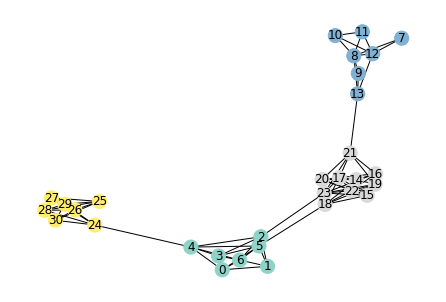

In [6]:
#graph generating
sizes = [7, 7, 10, 7]
probs = [[0.8, .02, .02, .02], [.02, 0.8, .02, .02], [0.02, 0.02, 0.8, .02], [.02, .02, .02, .8]]
true_labels=[]
i=0
for size in sizes:
    true_labels += ([i]*size)
    i += 1
G = nx.stochastic_block_model(sizes, probs, seed=212)
# nx.draw(G, node_size=200)
# plt.figure(figsize=(9,9))
nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)
plt.show()

In [7]:
full_experiment_on_graph(G, true_labels)

Best number of clusters detected : 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4
Number for communities for Girvan Newman: 4


,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Girvan Newman,Leiden
0,kamada_kawai,1.000000,0.770021,1.000000,1.000000,0.655709,1.0,0.505524
1,spring,0.655709,0.963104,0.655709,0.655709,0.655709,1.0,0.505524
2,davidson_harel,0.505524,0.442248,0.505524,0.505524,0.505524,1.0,0.505524
3,drl,0.505524,0.505524,0.505524,0.505524,0.252396,1.0,0.505524
4,fruchterman_reingold,0.505524,0.505524,0.505524,0.505524,0.249358,1.0,0.505524
5,graphopt,0.505524,0.508054,0.505524,0.505524,0.252396,1.0,0.505524
6,lgl,0.005677,0.505524,0.005677,0.005677,0.005677,1.0,0.505524
7,mds,0.220871,0.214165,0.220871,0.250549,0.212205,1.0,0.505524


### More complicated grapgh

In [1]:
import sys  
import networkx as nx
sys.path.insert(1, 'C:/Users/Kinga/Desktop/MAGISTERKA/code')

from clustering_script import *

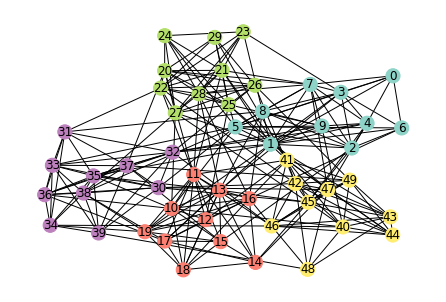

In [2]:
#graph generating
sizes = [10, 10, 10, 10, 10]
# probs = [[0.8, .02, .02, .02], [.02, 0.8, .02, .02], [0.02, 0.02, 0.8, .02], [.02, .02, .02, .8]]
probs = [[.8, .08, .08, .08, .08], [.08, .8, .08, .08, .08], [.08, .08, .8, .08, .08], [.08, .08, .08, .8, .08], [.08, .08, .08, .08, .8]]

true_labels=[]
i=0
for size in sizes:
    true_labels += ([i]*size)
    i += 1
G = nx.stochastic_block_model(sizes, probs, seed=212)
# nx.draw(G, node_size=200)
# plt.figure(figsize=(9,9))
nx.draw(G, node_color=true_labels, cmap=plt.cm.Set3, with_labels=True, node_size=200)
plt.show()

In [16]:
full_experiment_on_graph(G, true_labels)

,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Girvan Newman,Leiden
0,kamada_kawai,0.352881,0.092630,0.449675,0.449675,0.295465,0.196721,0.248667
1,spring,0.607241,0.246471,0.845631,0.894379,0.392870,0.196721,0.248667
2,davidson_harel,0.118170,0.009318,0.131677,0.122547,0.113906,0.196721,0.248667
3,drl,0.044705,0.004976,0.014311,0.030137,0.015704,0.196721,0.248667
4,fruchterman_reingold,0.048707,-0.005217,0.081939,0.088621,0.072049,0.196721,0.248667
5,graphopt,0.117178,0.022954,0.041007,0.032177,0.131103,0.196721,0.248667
6,lgl,0.000000,0.010618,0.000000,0.000000,0.000000,0.196721,0.248667
7,mds,0.126448,0.068768,0.130506,0.106094,0.169252,0.196721,0.248667


In [3]:
full_experiment_on_graph(G, true_labels)

,layout,AgglomerativeClustering,OPTICS,KMeans,GMM,Birch,Girvan Newman,Leiden
0,kamada_kawai,0.352881,0.092630,0.449675,0.449675,0.295465,1.0,0.248667
1,spring,0.593824,0.213500,0.747589,0.766782,0.423343,1.0,0.248667
2,davidson_harel,0.153268,0.074981,0.232079,0.092840,0.173135,1.0,0.248667
3,drl,0.127217,0.013801,0.053273,0.112199,0.050751,1.0,0.248667
4,fruchterman_reingold,0.178292,0.053589,0.077461,0.077461,0.185216,1.0,0.248667
5,graphopt,0.229724,0.037082,0.228479,0.235147,0.187552,1.0,0.248667
6,lgl,0.000000,-0.020218,0.000000,0.000000,0.000000,1.0,0.248667
7,mds,0.126448,0.068768,0.130506,0.106094,0.169252,1.0,0.248667
